In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Read/Save to Excel data

In [3]:
excel_data = pd.read_excel('excel_test_data.xlsx', sheet_name=None)
print('Sheet names:', excel_data.keys())
df = excel_data['sheet3']
df.head(22)

Sheet names: dict_keys(['sheet1', 'sheet2', 'sheet3'])


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,[B2] start of ill-format excel file,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,[A8] second data appearance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check [here](https://stackoverflow.com/questions/42370977/how-to-save-a-new-sheet-in-an-existing-excel-file-using-pandas) for inserting new sheets to existing Excel files.



In [4]:
# excel_data['sheet3'].to_excel('excel_test_output.xlsx', index=False, sheet_name='sheet3_output', header=None)
excel_data['sheet1'].to_excel('excel_test_output.xlsx', index=False)

For concat, merge, join, etc., see a very good description/example [here](https://pandas.pydata.org/docs/user_guide/merging.html)


In [5]:
df1 = excel_data['sheet1']
df2 = excel_data['sheet2']
df3 = excel_data['sheet3']

In [6]:
pd.concat([df1, df2], axis=1, ignore_index=False, )

,purge,pulse,is_high_dilute,NH3_pulse,NH3_purge,is_high_dilute
0,0.25,0.75,1,1,1.25,0
1,0.15,0.45,1,1,2.50,0
2,0.25,0.75,1,2,2.50,1
3,0.25,0.75,0,2,5.00,0
4,0.15,0.60,0,3,3.75,1
5,0.15,0.60,1,3,4.00,1


### combination generator

In [7]:
a = ["foo", "melon"]
b = [True, False]
c = list(itertools.product(a, b))
pd.DataFrame(c,columns=['type', 'status'])

,type,status
0,foo,True
1,foo,False
2,melon,True
3,melon,False


### batch for THK prediction


In [8]:
recipe = pd.DataFrame([[0.25, 0.75]], columns=['pulse', 'purge'])
cycle = pd.Series(np.linspace(10,15,6),name='cycle').astype('int64')
print(recipe)
print()
print(cycle)
pd.merge(recipe, cycle, how='cross').sort_values('cycle', ascending=False)

   pulse  purge
0   0.25   0.75

0    10
1    11
2    12
3    13
4    14
5    15
Name: cycle, dtype: int64


,pulse,purge,cycle
5,0.25,0.75,15
4,0.25,0.75,14
3,0.25,0.75,13
2,0.25,0.75,12
1,0.25,0.75,11
0,0.25,0.75,10


### Batch for prediction of 2 variables

In [24]:
loop_ratio = pd.Series([1,3,12, 24], name='loop_ratio')
nh3_pulse = pd.Series([1.0, 2.0, 3.0], name='nh3_pulse')
tmp = pd.merge(recipe, loop_ratio, how='cross')
print(tmp)
tmp = pd.merge(tmp, nh3_pulse, how='cross')
tmp

   pulse  purge  loop_ratio
0   0.25   0.75           1
1   0.25   0.75           3
2   0.25   0.75          12
3   0.25   0.75          24


,pulse,purge,loop_ratio,nh3_pulse
0,0.25,0.75,1,1.0
1,0.25,0.75,1,2.0
2,0.25,0.75,1,3.0
3,0.25,0.75,3,1.0
4,0.25,0.75,3,2.0
5,0.25,0.75,3,3.0
6,0.25,0.75,12,1.0
7,0.25,0.75,12,2.0
8,0.25,0.75,12,3.0
9,0.25,0.75,24,1.0


### Use pivot to pick out two variables for heatmap plot

<AxesSubplot:xlabel='nh3_pulse', ylabel='loop_ratio'>

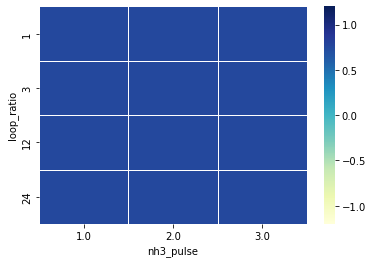

In [25]:
df_plot = tmp.pivot(index="loop_ratio", columns="nh3_pulse", values="purge")
sns.heatmap(df_plot, linewidth=0.5, cmap="YlGnBu", vmax=1.2, vmin=-1.2, center=0)

### Find the cloesest value in a series by argsort

In [35]:
given = 3.0

df_sorted = tmp.iloc[(tmp['nh3_pulse']-given).abs().argsort()[:]]
df_sorted

,pulse,purge,loop_ratio,nh3_pulse
2,0.25,0.75,1,3.0
5,0.25,0.75,3,3.0
8,0.25,0.75,12,3.0
11,0.25,0.75,24,3.0
1,0.25,0.75,1,2.0
4,0.25,0.75,3,2.0
7,0.25,0.75,12,2.0
10,0.25,0.75,24,2.0
0,0.25,0.75,1,1.0
3,0.25,0.75,3,1.0


In [37]:
print(df_sorted.index.to_list())
print(df_sorted['nh3_pulse'].to_list())

[2, 5, 8, 11, 1, 4, 7, 10, 0, 3, 6, 9]
[3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]
